## 7.1 확률적 데이터와 확률변수

여러분이 의사라고 가정하자. 여러분은 환자로부터 여러가지 숫자, 즉 데이터를 받게 된다. 한 명의 환자가 주는 데이터는 크게 두 가지로 나눌 수 있는데 하나는 생년월일처럼 한 번 물어보면 더이상 물어볼 필요가 없는 데이터, 또 하나는 혈압, 체온처럼 환자가 내원할 때마다 물어보게 되는 데이터다. 같은 환자에게 생년월일을 한 번만 묻는 이유는 누가 언제 물어보더라도 그 값이 바뀌지 않기 때문이다. 반대로 혈압과 같은 데이터는 계속 다른 값이 나올 수 있다. 이전에 100번을 측정해 보았다 하더라도 이번에 어떤 값이 나올지 100% 정확하게 예측할 수 없다. 심지어는 같은 시간에 같은 사람의 혈압을 측정해도 측정하는 사람과 장비에 따라서 다를 수도 있다. 하지만 혈압을 100% 정확하게 예측할 수 없다는 말이 혈압이라는 데이터에 대해 아무런 정보나 지식이 없다는 뜻은 아니다. 예를 들어 혈압계에서 1000이라는 값이나 -10이라는 값이 나온다면 우리는 혈압계가 고장났다고 생각할 것이다. 

이 절에서는 다음과 같은 질문에 대해 대답할 수 있는 방법을 생각해 본다.

* 어떤 데이터가 생년월일처럼 변하지 않는 데이터인지 혹은 측정할 때마다 변할 수 있는 데이터인지 구분할 수 있는가? 
* 혈압과 같이 100% 정확하게 예측할 수 없는 데이터가 있을 때 이 데이터로부터 우리가 얻는 지식은 무엇인가? 그것을 어떻게 표현할 수 있는가?
* 이러한 데이터를 수학적으로 표현하는 방법을 알아본다.

### 확률적 데이터

실험, 측정, 조사 등을 통해 어떤 데이터값을 반복적으로 얻는 경우를 생각하자. 생년월일처럼 언제 누가 얻더라도 항상 같은 값이 나오는 데이터를 **결정론적 데이터(deterministic data)**라고 하고 혈압처럼 정확히 예측할 수 없는 값이 나오는 데이터를 **확률적 데이터(random data, probabilistic data, stochastic data)**라고 한다. 우리가 다루는 대부분의 데이터는 확률적 데이터다. 

데이터가 확률적이 되는 이유는 

* 여러 조건이나 상황에 따라 데이터값이 영향을 받기 때문일 수도 있고 
* 측정 시에 발생하는 오차 때문일 수도 있다.

### 분포

그런데 대부분의 확률적 데이터값을 살펴보면 어떤 값은 자주 등장하고 어떤 값은 드물게 나오거나 나오지 않는 경우가 많다. 확률적 데이터에서 어떠한 값이 자주 나오고 어떠한 값이 드물게 나오는가를 나타내는 정보를 **분포(distribution)**라고 한다. 

분포는 범주형 데이터의 경우 **카운트 플롯(count plot)**, 실수형 데이터의 경우  **히스토그램(histogram)**을 사용하여 시각적으로 표현할 수 있다. 예를 들어 다음과 같은 21개 데이터가 있다고 하자.

In [4]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
np.random.seed(0)
x = np.random.normal(size=21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

이 데이터를 -4부터 4까지 0.5 크기의 구간을 가진 히스토그램으로 나타내면 다음과 같다. 시본 패키지의 `distplot` 명령을 사용한다.

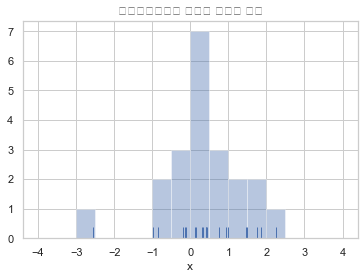

In [7]:
%matplotlib inline
bins = np.linspace(-4, 4, 17)
sns.distplot(x, rug=True, kde=False, bins=bins)
plt.title("히스토그램으로 나타낸 데이터 분포")
plt.xlabel("x")
plt.show()

### 기술통계

 분포를 표현하는 또다른 방법은 분포의 특징을 나타내는 여러가지 숫자를 계산하여 그 숫자로서 분포를 나타내는 것이다. 이러한 값들을 **기술통계(descriptive statistics)**라고 한다. 대표적인 기술통계는 다음과 같다.

* 표본평균, 표본중앙값, 표본최빈값
* 표본분산, 표본표준편차
* 표본왜도, 표본첨도

### 표본평균

정상인의 최고혈압(수축기혈압, systolic blood pressure)은 얼마인가라는 질문에 하나의 숫자로 대답해야 한다면 어떻게 답할 것인가?

정상인의 최고혈압은 확률적 데이터다. 즉, 사람마다 그리고 측정하는 상황에 따라 다를 수 있다. 하지만 의사에게 같은 질문을 한다면 대부분 "120 mmHg 정도입니다"라고 말할 것이다. 여기에서 120이라는 값은 정상인의 최고혈압을 대표하는 값이다. 이렇게 확률적인 데이터값을 대표하는 몇 가지 기술통계가 있는데 그중 하나가 표본평균이다.

일반적으로 부르는 평균(mean, average)의 정확한 명칭은 **표본평균(sample mean, sample average)**이다. 표본평균은 데이터 분포의 대략적인 위치를 나타낸다. 표본평균의 기호로는 알파벳 $m$ 또는 데이터를 나타내는 변수 기호 위에 bar를 붙인 $\bar x$ 기호를 사용한다.

$$ 
\begin{align}
m = \bar{x} = \dfrac{1}{N}\sum_{i=1}^{N} x_i 
\tag{7.1.1}
\end{align}
$$

이 식에서 $N$는 자료의 개수, $i$는 자료의 순서(index)를 뜻한다. 

### 표본중앙값

**표본중앙값(sample median)**은 전체 자료를 크기별로 정렬했을 때 가장 중앙에 위치하는 값을 말한다. 표본 중앙값에도 몇 가지의 정의가 존재하지만 대표적인 정의는 다음과 같다.

전체 표본 개수가 $N$인 경우,

* $N$이 홀수이면 : 중앙값은 $(N + 1)/2$번째 표본의 값
* $N$이 짝수이면 : 중앙값은 $N/2$번째 표본의 값과 $N/2 + 1$번째 표본의 값의 평균

예를 들어 99명의 최고혈압을 측정한 데이터가 가장 낮은 값부터 가장 높은 값까지 순서대로 정렬했을 때 50번째 사람의 최고혈압이 이 데이터의 표본중앙값이 된다. 사람 수가 100명이라면 50번째 데이터와 51번째 데이터의 평균값을 사용한다.

### 표본최빈값

**표본최빈값(most frequent value, sample mode)**은 데이터값 중 가장 빈번하게 나오는 값을 말한다. 혈액형, 나이, 남녀 구분 등 유한한 종류의 값만 있는 데이터에서는 최빈값을 쉽게 구할 수 있지만 혈압, 키, 몸무게 등 연속적인 값을 가지는 데이터에서는 (정밀도가 무한히 높다는 가정하에) 똑같은 값이 나올 확률이 아주 작기 때문에 최빈값을 구하기 어렵고 의미도 없다. 따라서 연속적인 값의 경우에는 일정한 구간 간격으로 나누어 가장 많은 데이터를 가진 구간의 대푯값을 그 데이터의 최빈값으로 가정하는 방법을 많이 사용한다. 하지만 이 방법도 구간을 어떻게 나누는가에 따라 달라질 수 있기 때문에 신뢰할 수 있는 방법이 아니다.

### 파이썬을 사용한 대푯값 계산

파이썬에서는 다음과 같은 NumPy 함수를 사용하여 각종 대푯값을 계산할 수 있다. 범주형 데이터는 실수로 바꾼 다음에 대푯값을 계산한다.

* [`mean()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html): 표본평균 계산
* [`median()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html): 표본중앙값 계산
* [`argmax()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html): 이산데이터의 최댓값 계산
* [`histogram()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html): 데이터를 구간으로 나누어 각 구간에 들어가는 데이터 개수 계산.

표본평균과 표본중앙값은 다음처럼 구한다.

In [3]:
print("표본평균 = {}, 표본중앙값 = {}".format(np.mean(x), np.median(x)))

표본평균 = 0.4206524782418389, 표본중앙값 = 0.4001572083672233


하지만 연속데이터에 대한 최빈값은 의미 없는 숫자가 나오므로 구간으로 나누어 최빈구간을 구해야 한다.

In [4]:
ns, _ = np.histogram(x, bins=bins)
m_bin = np.argmax(ns)
print("최빈구간 = {}~{}".format(bins[m_bin], bins[m_bin + 1]))

최빈구간 = 0.0~0.5


### 단봉분포와 다봉분포

분포의 모양에서 봉우리가 하나면 **단봉(uni-modal)분포**, 봉우리가 여럿이면 **다봉(multi-modal)분포**라고 한다.

#### 연습 문제 7.1.1

다음 명령으로 붓꽃의 꽃잎 길이(petal length) 데이터를 구하고 히스토그램을 그려 분포의 모양을 살핀다.

```
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
```

(1) 꽃잎 길이의 분포는 단봉분포인가 다봉분포인가?

(2) 데이터프레임에서 종(species)이 `setosa`인 데이터만 뽑아서 히스토그램을 그려라. 이 분포는 단봉분포인가 다봉분포인가?


In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

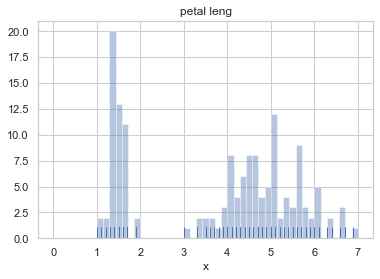

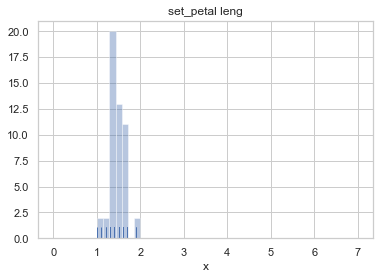

In [27]:
#challenge1
petal_len = df.iloc[:,2]
max(df.iloc[:,2]) #6.9
min(df.iloc[:,2]) #1.0
bins = np.linspace(0, 7, 50)
sns.distplot(petal_len, rug=True, kde=False, bins=bins)
plt.title("petal leng")
plt.xlabel("x")
plt.show()

#challenge2
seto_petal_len = df.loc[df['species'] == 'setosa'].iloc[:,2]
sns.distplot(seto_petal_len, rug=True, kde=False, bins=bins)
plt.title("set_petal leng")
plt.xlabel("x")
plt.show()

### 대칭분포

표본평균, 표본중앙값, 표본최빈값은 분포의 모양에 따라 다음과 같은 특성을 보인다.

* 분포가 표본평균을 기준으로 대칭인 대칭(symmetric)분포이면 표본중앙값은 표본평균과 같다.
* 분포가 대칭분포이면서 하나의 최고값만을 가지는 단봉분포이면 표본최빈값은 표본평균과 같다.
* 대칭분포를 비대칭으로 만드는 데이터가 더해지면 표본평균이 가장 크게 영향을 받고 표본최빈값이 가장 적게 영향을 받는다.

다음 히스토그램은 대칭인 분포를 비대칭으로 만드는 데이터가 더해졌을 때 표본평균, 표본중앙값, 표본최빈값이 어떻게 변하는지를 보인다.

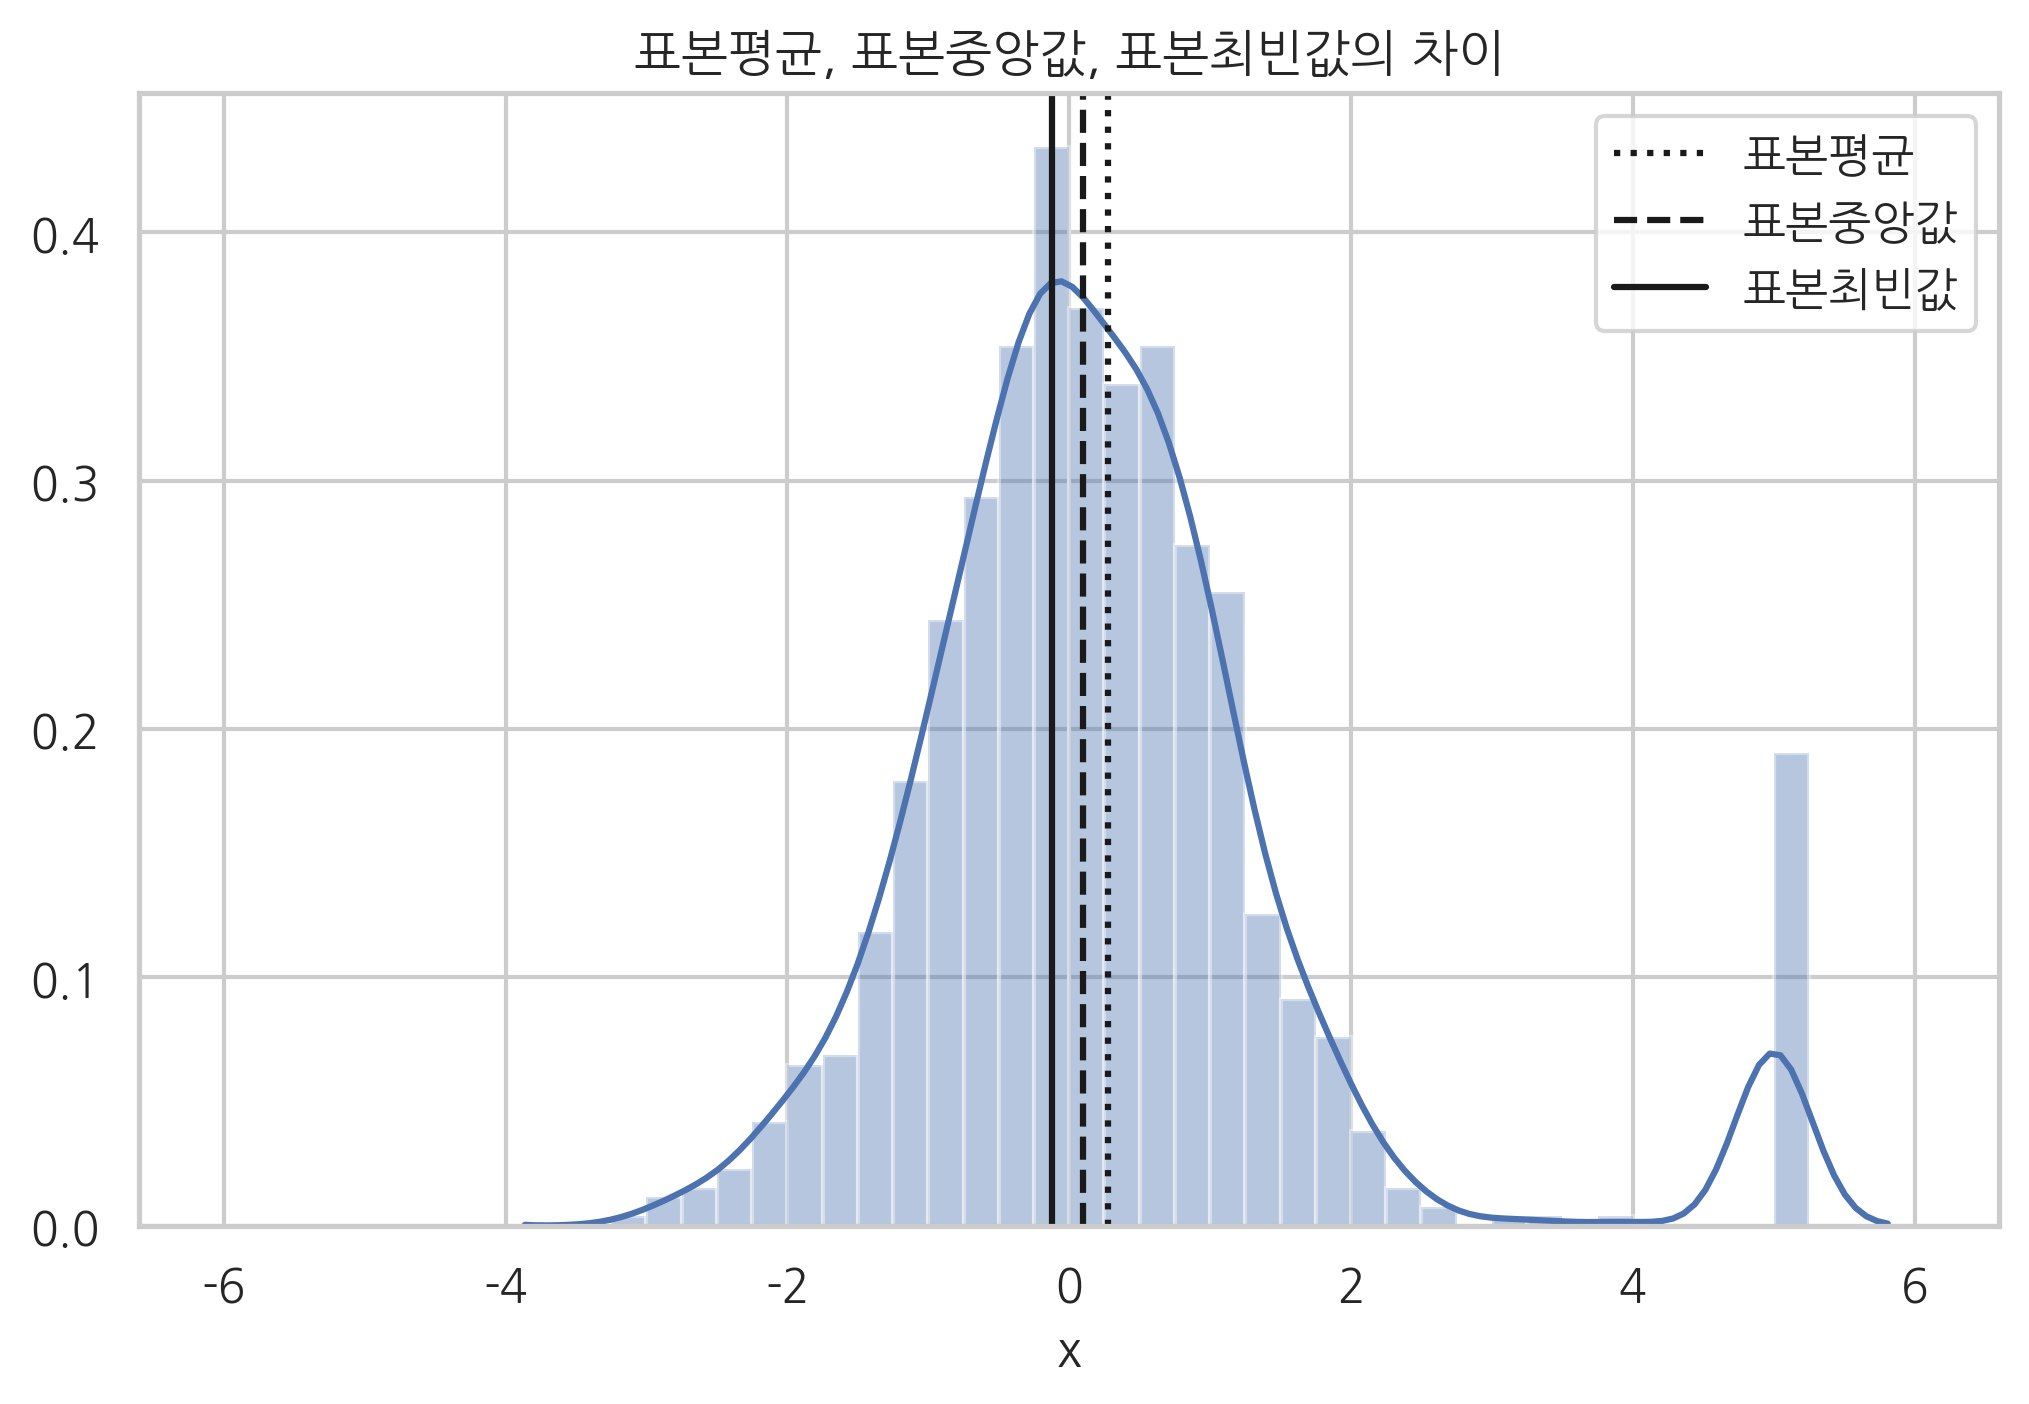

In [5]:
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
ns, _ = np.histogram(x, bins=bins)

sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(x, bins=bins)
plt.axvline(sample_mean, c='k', ls=":", label="표본평균")
plt.axvline(sample_median, c='k', ls="--", label="표본중앙값")
plt.axvline(sample_mode, c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

#### 연습 문제 7.1.2

(1) virginica 종 붓꽃의 꽃잎 길이(petal length) 데이터에 대해 표본평균, 표본중앙값, 표본최빈값을 구하고 위와 같이 그림으로 그려라. 표본최빈값을 구할 때는 0cm부터 10cm까지 1cm 간격으로 히스토그램을 그려서 표본최빈값을 구하라.

(2) 히스토그램의 구간 수를 50개, 100개로 세분화하여 다시 표본최빈값을 구하라. 표본최빈값이 어떻게 달라지는가?

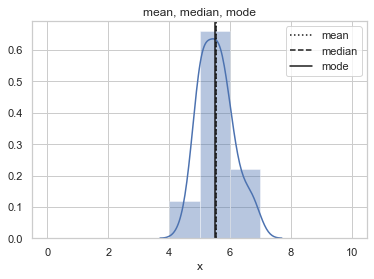

sample mean, median, mode
5.552
5.55
5.5


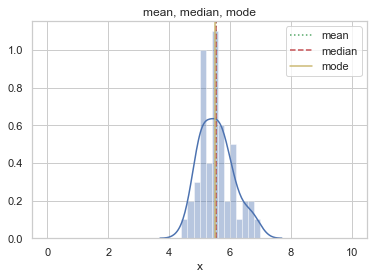

sample mean, median, mode
5.552
5.55
5.5


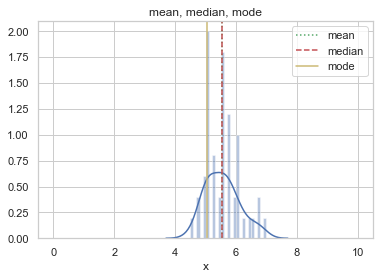

sample mean, median, mode
5.552
5.55
5.050000000000001


In [48]:
virgin_petal_len = df.loc[df['species'] == 'virginica'].iloc[:,2]
bins = np.linspace(0, 10, 11)
ns, _ = np.histogram(virgin_petal_len, bins=bins)

sample_mean = np.mean(virgin_petal_len)
sample_median = np.median(virgin_petal_len)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(virgin_petal_len, bins=bins)
plt.axvline(sample_mean, c='k', ls=":", label="mean")
plt.axvline(sample_median, c='k', ls="--", label="median")
plt.axvline(sample_mode, c='k', ls="-", label="mode")
plt.title("mean, median, mode")
plt.xlabel("x")
plt.legend()
plt.show()
print('sample mean, median, mode')
print(sample_mean)
print(sample_median)
print(sample_mode)

bins = np.linspace(0, 10, 51)
ns, _ = np.histogram(virgin_petal_len, bins=bins)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])
sns.distplot(virgin_petal_len, bins=bins)
plt.axvline(sample_mean, c='g', ls=":", label="mean")
plt.axvline(sample_median, c='r', ls="--", label="median")
plt.axvline(sample_mode, c='y', ls="-", label="mode")
plt.title("mean, median, mode")
plt.xlabel("x")
plt.legend()
plt.show()
print('sample mean, median, mode')
print(sample_mean)
print(sample_median)
print(sample_mode)

bins = np.linspace(0, 10, 101)
ns, _ = np.histogram(virgin_petal_len, bins=bins)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])
sns.distplot(virgin_petal_len, bins=bins)
plt.axvline(sample_mean, c='g', ls=":", label="mean")
plt.axvline(sample_median, c='r', ls="--", label="median")
plt.axvline(sample_mode, c='y', ls="-", label="mode")
plt.title("mean, median, mode")
plt.xlabel("x")
plt.legend()
plt.show()

print('sample mean, median, mode')
print(sample_mean)
print(sample_median)
print(sample_mode)

### 분산과 표준편차

앞에서 정상인의 최고혈압 대푯값은 120이라고 했다. 
그렇다면 어떤 사람의 최고혈압이 130이 나왔다면 그 사람은 정상이라고 할 수 없는 것일까? 
이러한 판단을 하려면 데이터가 얼마나 변동(variation)하고 있는지를 알아야 한다. 
이러한 정보를 알려주는 특징값이 **표본분산(sample variance)** 또는 **표본표준편차(sample standard deviation)**이다. 
평균이나 기댓값이 분포의 **위치**를 대표하는 것이라면 분산은 분포의 **폭(width)**을 대표하는 값이다. 표준편차는 분산에 대한 양의 제곱근(square root)값이다.

$$
\begin{align}
\text{표준편차} = \sqrt{\text{분산}}
\tag{7.1.2}
\end{align}
$$

표본분산은 다음처럼 구한다. 식에서 $\bar{x}$은 표본평균이다.

$$ 
\begin{align}
s^2 = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-\bar{x})^2 
\tag{7.1.3}
\end{align}
$$


다음 그림에서 볼 수 있듯이 이 식은 자료값과 평균 사이의 거리를 의미한다. 다만 자료값이 평균보다 작을 때는 음수가 나오므로 제곱을 하여 모두 양수로 만들어준 것이다. 

만약 분포가 하나의 대푯값 근처에 모여있다면 대부분의 데이터는 "대푯값 $\pm$ 표준편차" 범위 안에 있다. 참고로 정상인의 최고혈압의 표준편차는 약 20이다. 따라서 대다수의 최고혈압 데이터는 $120 \pm 20$ 범위 안에 있다고 할 수 있으므로 130이라는 숫자는 비정상이라고 보기 힘들다.

<img src="https://datascienceschool.net/upfiles/d533b6131841430c81207c9bf4cc0e02.png" style="width: 100%;">

그림 7.1.1 : 표본분산과 표본표준편차

위 식에서 구한 표본분산은 정확하게 말하면 편향오차를 가진 **편향 표본분산(biased sample variance)**이다. 이와 대조되는 **비편향 표본분산(unbiased sample variance)**은 다음과 같이 구한다.

$$ 
\begin{align}
s^2_{\text{unbiased}} = \dfrac{1}{N-1}\sum_{i=1}^{N} (x_i-\bar{x})^2
\tag{7.1.4}
\end{align}
$$


### 파이썬을 사용한 표본분산 및 표본표준편차의 계산

파이썬에서 표본분산과 표본표준편차를 구할 때는 다음 함수를 사용한다. `ddof` 인수를 이용하면 비편향 표본분산과 표본표준편차를 구할 수 있다.

* [`var()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)
* [`std()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)

In [6]:
sp.random.seed(0)
x = sp.stats.norm(0, 2).rvs(1000)  # 평균=0, 표준편차=2 인 정규분포 데이터 생성

In [7]:
np.var(x), np.std(x) # 편향 표본분산, 표본표준편차

(3.896937825248617, 1.9740663173380515)

In [8]:
np.var(x, ddof=1), np.std(x, ddof=1)  # 비편향 표본분산, 표본표준편차

(3.900838663912529, 1.9750540913890255)

#### 연습 문제 7.1.3

다음 명령으로 다우지수의 일간수익률 데이터를 구할 수 있다. 

```
import pandas_datareader.data as web

df = web.DataReader("DJCA", data_source='fred').dropna()["DJCA"]
r = np.log(df / df.shift(1)).dropna().values
```

(1) 다우지수 일간수익률의 표본평균, 표본분산, 표본표준편차를 구하라.

(2) 일간수익률의 표본표준편차에 대략적인 연간 거래일수 256일의 제곱근인 16을 곱해서 % 단위로 나타낸 것을 연간변동성(annual volatility)이라고 한다. 다우지수의 연간변동성을 구하라.


In [49]:
import pandas_datareader.data as web

df = web.DataReader("DJCA", data_source='fred').dropna()["DJCA"]
r = np.log(df / df.shift(1)).dropna().values

In [55]:
print(np.mean(r))
print(np.var(r))
print(np.std(r))

np.std(r, ddof=1) * 16 * 100

0.00016633722408718554
0.000145037501270904
0.012043151633642417


19.276724114078704

### 표본비대칭도

평균과의 거리의 세제곱을 이용하여 구한 특징값을 **표본비대칭도(sample skewness)**라고 한다. **표본비대칭도가 0이면 분포가 대칭**이다. 표본비대칭도가 음수면 표본평균값을 기준으로 왼쪽에 있는 값을 가진 표본이 나올 가능성이 더 많다는 뜻이다.


$$ 
\begin{align}
\text{표본비대칭도} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^3}{ \sqrt{\tfrac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2}^{\,3}}
\tag{7.1.5}
\end{align}
$$

<img src="https://datascienceschool.net/upfiles/fbef84feab4646cf918e1b474ef07290.png" style="width=100%;">

그림 7.1.2 : 분포에 따른 표본비대칭도

### 표본첨도

평균과의 거리의 네제곱을 이용하여 구한 특징값을 **표본첨도(sample kurtosis)**라고 한다. 표본첨도는 데이터가 중앙에 몰려있는 정도를 정밀하게 비교하는데 쓰인다. 사람의 눈으로 첨도를 구별하는 것은 어렵다. 표본첨도의 기준은 나중에 설명할 정규분포다. 정규분포보다 첨도가 높으면 양수, 정규분포보다 첨도가 낮으면 음수로 정의한다.


$$ 
\begin{align}
\text{표본첨도} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^4}{\left(\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2\right)^2} - 3
\tag{7.1.6}
\end{align}
$$


사이파이의 stats 서브패키지는 표본비대칭도와 표본첨도를 구하는 `skew()`, `kurtosis()` 명령을 제공한다.

In [56]:
sp.stats.skew(x), sp.stats.kurtosis(x)  

(-0.6947077935393484, 0.9596743701298678)

### 표본모멘트

분산, 비대칭도, 첨도를 구하기 위해 제곱, 세제곱, 네제곱을 하는 것처럼 $k$제곱을 이용하여 구한 모멘트를 $k$차 **표본모멘트(sample moment)**라고 한다. 

$$ 
\begin{align}
\text{표본모멘트} = 
\frac{1}{N}\sum_{i = 1}^{N} x^k_i
\tag{7.1.7}
\end{align}
$$

2차 표본모멘트 이상은 평균을 뺀 **표본중앙모멘트(sample centered moment)**값을 사용하기도 한다. 

$$ 
\begin{align}
\text{표본중앙모멘트} = 
\frac{1}{N}\sum_{i = 1}^{N} (x_i - \bar{x})^k
\tag{7.1.8}
\end{align}
$$

따라서 평균은 1차 모멘트, 분산은 2차 모멘트, 비대칭도와 첨도는 3차 모멘트와 4차 모멘트에서 유도된 값이다.

사이파이 stats 서브패키지는 표본모멘트를 구하는 `moment()` 명령을 제공한다.  인수로 모멘트 차수를 입력한다.

In [10]:
sp.stats.moment(x, 1), sp.stats.moment(x, 2), sp.stats.moment(x, 3), sp.stats.moment(x, 4)

(0.0, 3.896937825248617, 0.2604706193725514, 44.84817401965371)

### 확률변수

확률변수는 수학적으로 확률공간의 표본을 입력으로 받아서 실수인 숫자로 바꾸어 출력하는 함수다. 출력되는 실수가 데이터의 값이다. 표본값을 굳이 실수로 바꾸는 이유는 표본이 실수가 아니면 확률분포함수를 정의할 수 없기 때문이다. 

$$ 
\begin{align}
\omega \in \Omega \;\;\; \xrightarrow{\text{확률변수 } X} \;\; x \in \mathbf{R} 
\tag{7.1.9}
\end{align}
$$

$$ 
\begin{align}
X(\omega) = x
\tag{7.1.10}
\end{align}
$$

보통은 $X$ 등의 대문자 알파벳을 사용하여 확률변수를 표기한다. 확률변수에 의해 할당된 실수는 $x$와 같이 소문자 알파벳으로 표시한다. 경우에 따라서는 소문자 알파벳으로 확률변수를 표기하는 경우도 있다.



<img src="https://datascienceschool.net/upfiles/8b823f5f404b4f5cb8ea25b0260af851.png" style="width: 100%;">

그림 7.1.3 : 확률변수

### 이산확률변수

플레잉카드에서 나올 수 있는 모든 무늬(suit)의 집합인 표본집합 $\{\spadesuit, \heartsuit, \diamondsuit, \clubsuit\}$ 내의 모든 표본에 대해 다음과 같이 숫자를 할당하면 1부터 4까지 값을 가지는 확률변수가 된다. 이렇게 확률변수값이 연속적(continuous)이지 않고 떨어져(discrete) 있도록 정의할 수 있으면 **이산확률변수(discrete random variable)**라고 한다.

$$
\begin{align}
X(\spadesuit) = 1 , \;\;
X(\heartsuit) = 2 , \;\;
X(\diamondsuit) = 3 , \;\;
X(\clubsuit) = 4
\tag{7.1.11}
\end{align}
$$


확률공간의 표본에는 확률이 할당되어 있다. 예를 들어 모든 표본이 나올 가능성이 같다면 확률은 다음처럼 할당되어 있다는 뜻이다. 다음 식에서 $p$는 확률질량함수다.

$$
\begin{align}
p(\spadesuit) = \dfrac{1}{4}, \;\;
p(\heartsuit) = \dfrac{1}{4}, \;\;
p(\diamondsuit) = \dfrac{1}{4}, \;\;
p(\clubsuit) = \dfrac{1}{4}
\tag{7.1.12}
\end{align}
$$


표본공간의 원소의 개수가 무한대인 경우도 이산확률변수가 될 수 있다. 예를 들어 기하 분포(geometric distribution)나 포아송 분포(Poisson distribution) 등은 양의 정수값을 가지는 이산분포지만 표본의 갯수가 무한대다.

### 연속확률변수

주사위가 아닌 원반의 각도 문제처럼 연속적이고 무한대의 실수 표본값을 가지는 확률변수를 **연속확률변수(continuous random variable)**라고 한다. 
모든 표본이 실수인 숫자로 변한다면 모든 사건은 구간사건의 조합으로 표시된다. 즉, 확률이 어떻게 할당되었는가를 나타내는 정보인 확률분포를 수학적인 확률분포함수로 나타낼 수 있다는 뜻이다.

### 확률변수는 데이터 생성기

확률적 데이터는 어떤 실험 행위에 의해 얻어지는 경우가 많다. 예를 들어 

* 주사위를 던지는 실험 
* 자동차 엔진의 출력을 측정하는 실험
* 혈압을 측정하는 실험

등을 같은 조건에서 여러 번 반복하여 확률적 데이터를 얻을 수 있다. 이 확률적 데이터들에는 데이터를 생성하게 한 주사위, 자동차 엔진, 사람 등의 데이터 생성기가 명확하게 존재한다. 우리가 가진 데이터가 어떤 과정을 통해 얻어졌는지 구체적으로 알지 못한다고 해도 앞에서 예로 든 주사위, 자동차 엔진처럼 이 데이터를 생성한 무언가가 존재한다고 가정할 수 있다. 

확률변수는 실수인 데이터를 생성하는 데이터생성기다. 몇 가지 확률변수의 예를 들어보자.

* 공정한 주사위에서 나오는 숫자는 1부터 6까지의 숫자가 나오고 균일분포 확률분포함수를 가진 이산확률변수다.
* 정상인의 최고혈압은 실수가 나오고 120 mmHg 근처에서 기댓값을 가지는 단봉분포 모양의 확률분포함수를 가진 연속확률변수다.

#### 연습 문제 7.1.4

위에서 구한 붓꽃 데이터에서는 몇 개의 확률변수를 정의할 수 있는가? 

현실 세계의 데이터는 확률변수가 가진 확률분포에 따라 실수 표본공간에서 선택된 표본이다. 이렇게 확률분포함수에 따라 표본공간의 표본이 현실 세계의 데이터로 선택되는 것을 **실현(realization)** 혹은 **표본화(sampling)**라고 한다. 표본화는 다른 의미로도 사용되는데 많은 수의 데이터 집합에서 일부 데이터만 선택하는 과정도 표본화라고 한다. 

실현은 이상적이고(ideal), 추상적이며(abstract), 수학적인(mathematical) 세계에서 현실로 넘어가는 과정이다. 확률변수라는 데이터 모형에 따르면 현실의 표본 데이터는 이러한 수학적인 세계가 현실 세계에 투영된 그림자에 지나지 않는다. 따라서 히스토그램이나 기술통계 등 분포의 특성이 깨끗한 형태를 지니지 않지만 이는 실현 혹은 표본화 과정에서 생긴 잡음일 뿐이며 그 내면에는 원래의 수학적 특성을 내포하고 있다.

따라서 확률변수와 실제 데이터는 다음과 같은 관계가 있다.

* 확률변수로부터 데이터를 여러 번 생성하는 경우 실제 데이터값은 매번 달라질 수 있지만 확률변수 자체는 변하지 않는다.
* 확률변수의 확률분포함수는 우리가 직접 관찰할 수 없다. 다만 확률변수에서 만들어지는 실제 데이터값을 이용하여 확률분포함수가 이러한 것일 거라고 추정할 뿐이다.
* 확률변수에서 만들어지는 실제 데이터값은 확률변수가 가진 특성을 반영하고 있다. 데이터 개수가 적을수록 확률변수가 가진 특징을 정확하게 표현하지 못하지만 데이터 개수가 증가하면 보다 정확하게 확률분포함수를 묘사할 수 있게 된다.

<img src="https://datascienceschool.net/upfiles/5c6f256eb4aa4e8c9459e779b88936a9.png" style="width: 100%;">

그림 7.1.4 : 확률변수와 데이터

### 확률변수를 사용한 데이터 분석

확률변수를 사용하게 되면 데이터 분석은 보통 다음과 같은 순서로 이루어진다.

1. 데이터를 수집한다.
2. 수집한 데이터가 어떤 확률변수의 표본 데이터라고 가정한다.
3. 데이터를 사용하여 해당 확률변수의 확률분포함수의 모양을 결정한다.
4. 결정된 확률변수로부터 다음에 생성될 데이터나 데이터 특성을 예측한다.

이 과정 중 가장 중요한 것이 데이터값에서 확률변수의 확률분포함수를 역설계(reverse-engineering)하여 만들어내는 세 번째 단계다. 데이터에서 확률분포함수의 모양을 구하는 방법은 여러 가지가 있는데 가장 간단한 방법은 다음과 같이 기술통계값을 이용하는 것이다.

1. 데이터 분포가 가지는 표본평균, 표본분산 등의 기술통계값을 구한다.
2. 이 값과 같은 기술통계값을 가지는 확률분포함수를 찾는다.

위와 같은 방법을 쓰려면 표본 데이터가 없는 확률분포함수의 기술통계값을 구하는 방법을 알아야 한다. 다음 절부터는 확률분포함수의 기술통계값인 기댓값, 분산 등에 대해 공부한다.

<img src="https://datascienceschool.net/upfiles/d847bea789e14949af527a72d266cf6c.png" style="width: 100%;">

그림 7.1.5 : 확률분포함수의 추정